# Recap
---



# Pandas

Pandas is an open source Python library that is used for data manipulation and analysis of large amounts of data especially specializing with tabular data. We will be learning how to prepare, clean and transform data for plotting. We will need to import the Pandas package into our workspace like so `import pandas as pd`. This chapter comes with a reference Jupyter Notebook file. Please refer to it for more examples.

## Series

Data Type Name - Series

There are some differences worth noting between ndarrays and Series objects. First of all, elements in NumPy arrays are accessed by their integer position, starting with zero for the first element. A pandas Series Object is more flexible as you can use define your own labeled index to index and access elements of an array. You can also use letters instead of numbers, or number an array in descending order instead of ascending order. Second, aligning data from different Series and matching labels with Series objects is more efficient than using ndarrays, for example dealing with missing values. If there are no matching labels during alignment, pandas returns NaN (not any number) so that the operation does not fail.

Source: “Learning pandas”, Michael Heyd (Packt Publishing).


Let us explore the same:

In [1]:
import numpy as np
import pandas as pd

### Creating a Series using Pandas

You could convert a list,numpy array, or dictionary to a Series in the following manner

In [2]:
labels = ['w','x','y','z']
list = [10,20,30,40]
array = np.array([10,20,30,40])
dict = {'w':10,'x':20,'y':30,'z':40}

**Using Lists**

In [3]:
pd.Series(data=list)

0    10
1    20
2    30
3    40
dtype: int64

In [4]:
pd.Series(data=list,index=labels) # Specify the index

w    10
x    20
y    30
z    40
dtype: int64

In [5]:
pd.Series(list,labels)

w    10
x    20
y    30
z    40
dtype: int64

**Using NumPy Arrays to create Series**

In [6]:
pd.Series(array)

0    10
1    20
2    30
3    40
dtype: int32

In [7]:
pd.Series(array,labels)

w    10
x    20
y    30
z    40
dtype: int32

**Using Dictionary to create series**

In [8]:
pd.Series(dict)

w    10
x    20
y    30
z    40
dtype: int64

### Using an Index

We shall now see how to index in a Series using the following examples of 2 series

In [9]:
sports1 = pd.Series([1,2,3,4],index = ['Cricket', 'Football','Basketball', 'Golf'])     

In [10]:
sports1

Cricket       1
Football      2
Basketball    3
Golf          4
dtype: int64

In [12]:
sports2 = pd.Series([1,2,5,4],index = ['Cricket', 'Football','Baseball', 'Golf'])  

In [13]:
sports2

Cricket     1
Football    2
Baseball    5
Golf        4
dtype: int64

In [14]:
sports1['Cricket']

1

Operations are then also done based off of index:

In [15]:
sports1 + sports2 # Sorting if base on the index.

Baseball      NaN
Basketball    NaN
Cricket       2.0
Football      4.0
Golf          8.0
dtype: float64

## DataFrames

DataFrames concept in python is similar to that of R programming language. DataFrame is a collection of Series combined together to share the same index positions.

In [16]:
import pandas as pd
import numpy as np

In [17]:
from numpy.random import randn
np.random.seed(1)

In [20]:
dataframe = pd.DataFrame(randn(10,5),index='A B C D E F G H I J'.split(),columns='Score1 Score2 Score3 Score4 Score5'.split())

# 'A B C D E F G H I J'.split() gives a list

In [21]:
dataframe

Score1    Score2    Score3    Score4    Score5
A  0.300170 -0.352250 -1.142518 -0.349343 -0.208894
B  0.586623  0.838983  0.931102  0.285587  0.885141
C -0.754398  1.252868  0.512930 -0.298093  0.488518
D -0.075572  1.131629  1.519817  2.185575 -1.396496
E -1.444114 -0.504466  0.160037  0.876169  0.315635
F -2.022201 -0.306204  0.827975  0.230095  0.762011
G -0.222328 -0.200758  0.186561  0.410052  0.198300
H  0.119009 -0.670662  0.377564  0.121821  1.129484
I  1.198918  0.185156 -0.375285 -0.638730  0.423494
J  0.077340 -0.343854  0.043597 -0.620001  0.698032

### Selection and Indexing

Ways in which we can grab data from a DataFrame

In [22]:
dataframe['Score3']

A   -1.142518
B    0.931102
C    0.512930
D    1.519817
E    0.160037
F    0.827975
G    0.186561
H    0.377564
I   -0.375285
J    0.043597
Name: Score3, dtype: float64

In [23]:
# Pass a list of column names in any order necessary
dataframe[['Score2','Score1']]

Score2    Score1
A -0.352250  0.300170
B  0.838983  0.586623
C  1.252868 -0.754398
D  1.131629 -0.075572
E -0.504466 -1.444114
F -0.306204 -2.022201
G -0.200758 -0.222328
H -0.670662  0.119009
I  0.185156  1.198918
J -0.343854  0.077340

DataFrame Columns are nothing but a Series each

In [24]:
type(dataframe['Score1'])

pandas.core.series.Series

**Adding a new column to the DataFrame**

In [25]:
dataframe['Score6'] = dataframe['Score1'] + dataframe['Score2']

In [26]:
dataframe

Score1    Score2    Score3    Score4    Score5    Score6
A  0.300170 -0.352250 -1.142518 -0.349343 -0.208894 -0.052080
B  0.586623  0.838983  0.931102  0.285587  0.885141  1.425607
C -0.754398  1.252868  0.512930 -0.298093  0.488518  0.498470
D -0.075572  1.131629  1.519817  2.185575 -1.396496  1.056058
E -1.444114 -0.504466  0.160037  0.876169  0.315635 -1.948580
F -2.022201 -0.306204  0.827975  0.230095  0.762011 -2.328405
G -0.222328 -0.200758  0.186561  0.410052  0.198300 -0.423086
H  0.119009 -0.670662  0.377564  0.121821  1.129484 -0.551654
I  1.198918  0.185156 -0.375285 -0.638730  0.423494  1.384074
J  0.077340 -0.343854  0.043597 -0.620001  0.698032 -0.266514

**Removing Columns from DataFrame**

In [ ]:
dataframe.drop('Score6',axis=1)              # Use axis=0 for dropping rows and axis=1 for dropping columns

In [27]:
# column is not dropped unless inplace input is TRUE
dataframe

Score1    Score2    Score3    Score4    Score5    Score6
A  0.300170 -0.352250 -1.142518 -0.349343 -0.208894 -0.052080
B  0.586623  0.838983  0.931102  0.285587  0.885141  1.425607
C -0.754398  1.252868  0.512930 -0.298093  0.488518  0.498470
D -0.075572  1.131629  1.519817  2.185575 -1.396496  1.056058
E -1.444114 -0.504466  0.160037  0.876169  0.315635 -1.948580
F -2.022201 -0.306204  0.827975  0.230095  0.762011 -2.328405
G -0.222328 -0.200758  0.186561  0.410052  0.198300 -0.423086
H  0.119009 -0.670662  0.377564  0.121821  1.129484 -0.551654
I  1.198918  0.185156 -0.375285 -0.638730  0.423494  1.384074
J  0.077340 -0.343854  0.043597 -0.620001  0.698032 -0.266514

In [28]:
dataframe.drop('Score6',axis=1,inplace=True)

In [29]:
dataframe

Score1    Score2    Score3    Score4    Score5
A  0.300170 -0.352250 -1.142518 -0.349343 -0.208894
B  0.586623  0.838983  0.931102  0.285587  0.885141
C -0.754398  1.252868  0.512930 -0.298093  0.488518
D -0.075572  1.131629  1.519817  2.185575 -1.396496
E -1.444114 -0.504466  0.160037  0.876169  0.315635
F -2.022201 -0.306204  0.827975  0.230095  0.762011
G -0.222328 -0.200758  0.186561  0.410052  0.198300
H  0.119009 -0.670662  0.377564  0.121821  1.129484
I  1.198918  0.185156 -0.375285 -0.638730  0.423494
J  0.077340 -0.343854  0.043597 -0.620001  0.698032

**Dropping rows using axis=0**

In [36]:
dataframe.drop('A',axis=0)      # Row will also be dropped only if inplace=TRUE is given as input

Score1    Score2    Score3    Score4    Score5
B  0.586623  0.838983  0.931102  0.285587  0.885141
C -0.754398  1.252868  0.512930 -0.298093  0.488518
D -0.075572  1.131629  1.519817  2.185575 -1.396496
E -1.444114 -0.504466  0.160037  0.876169  0.315635
F -2.022201 -0.306204  0.827975  0.230095  0.762011
G -0.222328 -0.200758  0.186561  0.410052  0.198300
H  0.119009 -0.670662  0.377564  0.121821  1.129484
I  1.198918  0.185156 -0.375285 -0.638730  0.423494
J  0.077340 -0.343854  0.043597 -0.620001  0.698032

**Selecting Rows**

In [37]:
dataframe.loc['F'] # .loc refers to LABELS

Score1   -2.022201
Score2   -0.306204
Score3    0.827975
Score4    0.230095
Score5    0.762011
Name: F, dtype: float64

**Or select based off of index position instead of label - use iloc instead of loc function**

In [38]:
dataframe.iloc[2] # .iloc refers to INDEX

Score1   -0.754398
Score2    1.252868
Score3    0.512930
Score4   -0.298093
Score5    0.488518
Name: C, dtype: float64

In [39]:
dataframe.iloc[2,4]

0.48851814653749703

In [43]:
dataframe.iloc[0:6,:4]

Score1    Score2    Score3    Score4
A  0.300170 -0.352250 -1.142518 -0.349343
B  0.586623  0.838983  0.931102  0.285587
C -0.754398  1.252868  0.512930 -0.298093
D -0.075572  1.131629  1.519817  2.185575
E -1.444114 -0.504466  0.160037  0.876169
F -2.022201 -0.306204  0.827975  0.230095

**Selecting subset of rows and columns using loc function**

In [40]:
dataframe.loc['A','Score1'] # LABELS

0.3001703199558275

In [41]:
dataframe.loc[['A','B'],['Score1','Score2']] # LABELS

Score1    Score2
A  0.300170 -0.352250
B  0.586623  0.838983

### Conditional Selection

Similar to NumPy, we can make conditional selections using Brackets

In [44]:
dataframe

Score1    Score2    Score3    Score4    Score5
A  0.300170 -0.352250 -1.142518 -0.349343 -0.208894
B  0.586623  0.838983  0.931102  0.285587  0.885141
C -0.754398  1.252868  0.512930 -0.298093  0.488518
D -0.075572  1.131629  1.519817  2.185575 -1.396496
E -1.444114 -0.504466  0.160037  0.876169  0.315635
F -2.022201 -0.306204  0.827975  0.230095  0.762011
G -0.222328 -0.200758  0.186561  0.410052  0.198300
H  0.119009 -0.670662  0.377564  0.121821  1.129484
I  1.198918  0.185156 -0.375285 -0.638730  0.423494
J  0.077340 -0.343854  0.043597 -0.620001  0.698032

In [45]:
dataframe>0.5

Score1  Score2  Score3  Score4  Score5
A   False   False   False   False   False
B    True    True    True   False    True
C   False    True    True   False   False
D   False    True    True    True   False
E   False   False   False    True   False
F   False   False    True   False    True
G   False   False   False   False   False
H   False   False   False   False    True
I    True   False   False   False   False
J   False   False   False   False    True

In [46]:
dataframe[dataframe>0.5]

Score1    Score2    Score3    Score4    Score5
A       NaN       NaN       NaN       NaN       NaN
B  0.586623  0.838983  0.931102       NaN  0.885141
C       NaN  1.252868  0.512930       NaN       NaN
D       NaN  1.131629  1.519817  2.185575       NaN
E       NaN       NaN       NaN  0.876169       NaN
F       NaN       NaN  0.827975       NaN  0.762011
G       NaN       NaN       NaN       NaN       NaN
H       NaN       NaN       NaN       NaN  1.129484
I  1.198918       NaN       NaN       NaN       NaN
J       NaN       NaN       NaN       NaN  0.698032

In [47]:
dataframe[dataframe['Score1']>0.5]

Score1    Score2    Score3    Score4    Score5
B  0.586623  0.838983  0.931102  0.285587  0.885141
I  1.198918  0.185156 -0.375285 -0.638730  0.423494

In [48]:
dataframe[dataframe['Score1']>0.5]['Score2']

B    0.838983
I    0.185156
Name: Score2, dtype: float64

In [49]:
dataframe[dataframe['Score1']>0.5][['Score2','Score3']]

Score2    Score3
B  0.838983  0.931102
I  0.185156 -0.375285

**For multiple conditions you can use | and & with parenthesis**

In [50]:
dataframe[(dataframe['Score1']>0.5) & (dataframe['Score2'] > 0)]

Score1    Score2    Score3    Score4    Score5
B  0.586623  0.838983  0.931102  0.285587  0.885141
I  1.198918  0.185156 -0.375285 -0.638730  0.423494

## More Index Details

Some more features of indexing includes 
  - resetting the index 
  - setting a different value
  - index hierarchy

In [51]:
dataframe

Score1    Score2    Score3    Score4    Score5
A  0.300170 -0.352250 -1.142518 -0.349343 -0.208894
B  0.586623  0.838983  0.931102  0.285587  0.885141
C -0.754398  1.252868  0.512930 -0.298093  0.488518
D -0.075572  1.131629  1.519817  2.185575 -1.396496
E -1.444114 -0.504466  0.160037  0.876169  0.315635
F -2.022201 -0.306204  0.827975  0.230095  0.762011
G -0.222328 -0.200758  0.186561  0.410052  0.198300
H  0.119009 -0.670662  0.377564  0.121821  1.129484
I  1.198918  0.185156 -0.375285 -0.638730  0.423494
J  0.077340 -0.343854  0.043597 -0.620001  0.698032

In [62]:
# Reset to default index value instead of A to J
dataframe.reset_index()

dataframe

Score1    Score2    Score3    Score4    Score5
Countries                                                  
IND        0.300170 -0.352250 -1.142518 -0.349343 -0.208894
JP         0.586623  0.838983  0.931102  0.285587  0.885141
CAN       -0.754398  1.252868  0.512930 -0.298093  0.488518
GE        -0.075572  1.131629  1.519817  2.185575 -1.396496
IT        -1.444114 -0.504466  0.160037  0.876169  0.315635
PL        -2.022201 -0.306204  0.827975  0.230095  0.762011
FY        -0.222328 -0.200758  0.186561  0.410052  0.198300
IU         0.119009 -0.670662  0.377564  0.121821  1.129484
RT         1.198918  0.185156 -0.375285 -0.638730  0.423494
IP         0.077340 -0.343854  0.043597 -0.620001  0.698032

In [54]:
# Setting new index value
newindex = 'IND JP CAN GE IT PL FY IU RT IP'.split()

In [55]:
dataframe['Countries'] = newindex

In [56]:
dataframe

Score1    Score2    Score3    Score4    Score5 Countries
A  0.300170 -0.352250 -1.142518 -0.349343 -0.208894       IND
B  0.586623  0.838983  0.931102  0.285587  0.885141        JP
C -0.754398  1.252868  0.512930 -0.298093  0.488518       CAN
D -0.075572  1.131629  1.519817  2.185575 -1.396496        GE
E -1.444114 -0.504466  0.160037  0.876169  0.315635        IT
F -2.022201 -0.306204  0.827975  0.230095  0.762011        PL
G -0.222328 -0.200758  0.186561  0.410052  0.198300        FY
H  0.119009 -0.670662  0.377564  0.121821  1.129484        IU
I  1.198918  0.185156 -0.375285 -0.638730  0.423494        RT
J  0.077340 -0.343854  0.043597 -0.620001  0.698032        IP

In [57]:
dataframe.set_index('Countries')

Score1    Score2    Score3    Score4    Score5
Countries                                                  
IND        0.300170 -0.352250 -1.142518 -0.349343 -0.208894
JP         0.586623  0.838983  0.931102  0.285587  0.885141
CAN       -0.754398  1.252868  0.512930 -0.298093  0.488518
GE        -0.075572  1.131629  1.519817  2.185575 -1.396496
IT        -1.444114 -0.504466  0.160037  0.876169  0.315635
PL        -2.022201 -0.306204  0.827975  0.230095  0.762011
FY        -0.222328 -0.200758  0.186561  0.410052  0.198300
IU         0.119009 -0.670662  0.377564  0.121821  1.129484
RT         1.198918  0.185156 -0.375285 -0.638730  0.423494
IP         0.077340 -0.343854  0.043597 -0.620001  0.698032

In [58]:
# Once again, ensure that you input inplace=TRUE
dataframe

Score1    Score2    Score3    Score4    Score5 Countries
A  0.300170 -0.352250 -1.142518 -0.349343 -0.208894       IND
B  0.586623  0.838983  0.931102  0.285587  0.885141        JP
C -0.754398  1.252868  0.512930 -0.298093  0.488518       CAN
D -0.075572  1.131629  1.519817  2.185575 -1.396496        GE
E -1.444114 -0.504466  0.160037  0.876169  0.315635        IT
F -2.022201 -0.306204  0.827975  0.230095  0.762011        PL
G -0.222328 -0.200758  0.186561  0.410052  0.198300        FY
H  0.119009 -0.670662  0.377564  0.121821  1.129484        IU
I  1.198918  0.185156 -0.375285 -0.638730  0.423494        RT
J  0.077340 -0.343854  0.043597 -0.620001  0.698032        IP

In [59]:
dataframe.set_index('Countries',inplace=True)

In [60]:
dataframe

Score1    Score2    Score3    Score4    Score5
Countries                                                  
IND        0.300170 -0.352250 -1.142518 -0.349343 -0.208894
JP         0.586623  0.838983  0.931102  0.285587  0.885141
CAN       -0.754398  1.252868  0.512930 -0.298093  0.488518
GE        -0.075572  1.131629  1.519817  2.185575 -1.396496
IT        -1.444114 -0.504466  0.160037  0.876169  0.315635
PL        -2.022201 -0.306204  0.827975  0.230095  0.762011
FY        -0.222328 -0.200758  0.186561  0.410052  0.198300
IU         0.119009 -0.670662  0.377564  0.121821  1.129484
RT         1.198918  0.185156 -0.375285 -0.638730  0.423494
IP         0.077340 -0.343854  0.043597 -0.620001  0.698032

## Sorting

In [63]:
# unsorted data via index
unsorted_df = pd.DataFrame(np.random.randn(10,2),
                           index=[1,4,6,2,3,5,9,8,0,7],
                           columns=['col2','col1'])

unsorted_df

col2      col1
1 -0.447129  1.224508
4  0.403492  0.593579
6 -1.094912  0.169382
2  0.740556 -0.953701
3 -0.266219  0.032615
5 -1.373117  0.315159
9  0.846161 -0.859516
8  0.350546 -1.312283
0 -0.038696 -1.615772
7  1.121418  0.408901

In [64]:
# sorting via index, default is ascendng order
unsorted_df.sort_index()

col2      col1
0 -0.038696 -1.615772
1 -0.447129  1.224508
2  0.740556 -0.953701
3 -0.266219  0.032615
4  0.403492  0.593579
5 -1.373117  0.315159
6 -1.094912  0.169382
7  1.121418  0.408901
8  0.350546 -1.312283
9  0.846161 -0.859516

In [65]:
# sorting via index, descendng order
unsorted_df.sort_index(ascending=False)

col2      col1
9  0.846161 -0.859516
8  0.350546 -1.312283
7  1.121418  0.408901
6 -1.094912  0.169382
5 -1.373117  0.315159
4  0.403492  0.593579
3 -0.266219  0.032615
2  0.740556 -0.953701
1 -0.447129  1.224508
0 -0.038696 -1.615772

In [66]:
unsorted_df.sort_values(by='col1') # sort_values sort the PD according to a particular column.

col2      col1
0 -0.038696 -1.615772
8  0.350546 -1.312283
2  0.740556 -0.953701
9  0.846161 -0.859516
3 -0.266219  0.032615
6 -1.094912  0.169382
5 -1.373117  0.315159
7  1.121418  0.408901
4  0.403492  0.593579
1 -0.447129  1.224508

## Missing Data

Methods to deal with missing data in Pandas

In [180]:
import numpy as np
import pandas as pd

In [181]:
dataframe = pd.DataFrame({'Cricket':[1,2,np.nan,4,6,7,2,np.nan],
                  'Baseball':[5,np.nan,np.nan,5,7,2,4,5],
                  'Tennis':[1,2,3,4,5,6,7,8]})

In [182]:
dataframe

Cricket  Baseball  Tennis
0      1.0       5.0       1
1      2.0       NaN       2
2      NaN       NaN       3
3      4.0       5.0       4
4      6.0       7.0       5
5      7.0       2.0       6
6      2.0       4.0       7
7      NaN       5.0       8

In [183]:
dataframe.dropna()

Cricket  Baseball  Tennis
0      1.0       5.0       1
3      4.0       5.0       4
4      6.0       7.0       5
5      7.0       2.0       6
6      2.0       4.0       7

In [184]:
dataframe.dropna(axis=1)       # Use axis=1 for dropping columns with nan values

Tennis
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8

In [185]:
dataframe.dropna(thresh=2)

Cricket  Baseball  Tennis
0      1.0       5.0       1
1      2.0       NaN       2
3      4.0       5.0       4
4      6.0       7.0       5
5      7.0       2.0       6
6      2.0       4.0       7
7      NaN       5.0       8

In [186]:
dataframe.fillna(value=0)

Cricket  Baseball  Tennis
0      1.0       5.0       1
1      2.0       0.0       2
2      0.0       0.0       3
3      4.0       5.0       4
4      6.0       7.0       5
5      7.0       2.0       6
6      2.0       4.0       7
7      0.0       5.0       8

In [187]:
dataframe['Baseball'].fillna(value=dataframe['Baseball'].mean())

0    5.000000
1    4.666667
2    4.666667
3    5.000000
4    7.000000
5    2.000000
6    4.000000
7    5.000000
Name: Baseball, dtype: float64

In [188]:
dataframe.isnull()

Cricket  Baseball  Tennis
0    False     False   False
1    False      True   False
2     True      True   False
3    False     False   False
4    False     False   False
5    False     False   False
6    False     False   False
7     True     False   False

# Groupby

The groupby method is used to group rows together and perform aggregate functions

In [ ]:
import pandas as pd
# Create dataframe as given below
dat = {'CustID':['1001','1001','1002','1002','1003','1003'],
       'CustName':['UIPat','DatRob','Goog','Chrysler','Ford','GM'],
       'Profitinlakhs':[2005,3245,1245,8765,5463,3547]}

In [ ]:
dataframe = pd.DataFrame(dat)

In [ ]:
dataframe

**We can now use the .groupby() method to group rows together based on a column name. For example let's group based on CustID. This will create a DataFrameGroupBy object:**

In [ ]:
dataframe.groupby('CustID')

In [ ]:
CustID_grouped = dataframe.groupby("CustID")

Now we can aggregate using the variable

In [ ]:
CustID_grouped.mean()

### Or we can call the groupby function for each aggregation

In [ ]:
dataframe.groupby('CustID').mean()

In [ ]:
CustID_grouped.std()

In [ ]:
CustID_grouped.min()

In [ ]:
CustID_grouped.max()

In [ ]:
CustID_grouped.count()

In [ ]:
CustID_grouped.describe()

In [ ]:
CustID_grouped.describe().transpose()

In [ ]:
CustID_grouped.describe().transpose()['1001']

# Merging, Joining, and Concatenating

There are 3 important ways of combining DataFrames together: 
  - Merging 
  - Joining
  - Concatenating
  - Append

### Example DataFrames

In [72]:
import pandas as pd

In [73]:
dafa1 = pd.DataFrame({'Level1': ['SAP0', 'SAP1', 'SAP2', 'SAP3'],
                        'Level2': ['BD0', 'BD1', 'BD2', 'BD3'],
                        'Level3': ['CAT0', 'CAT1', 'CAT2', 'CAT3'],
                        'Level4': ['DS0', 'DS1', 'DS2', 'DS3']},
                        index=[0, 1, 2, 3])

In [74]:
dafa2 = pd.DataFrame({'Level1': ['SAP4', 'SAP5', 'SAP6', 'SAP7'],
                        'Level2': ['BD4', 'BD5', 'BD6', 'BD7'],
                        'Level3': ['CAT4', 'CAT5', 'CAT6', 'CAT7'],
                        'Level4': ['DS4', 'DS5', 'DS6', 'DS7']},
                         index=[4, 5, 6, 7]) 

In [75]:
dafa3 = pd.DataFrame({'Level1': ['SAP8', 'SAP9', 'SAP10', 'SAP11'],
                        'Level2': ['BD8', 'BD9', 'BD10', 'BD11'],
                        'Level3': ['CAT8', 'CAT9', 'CAT10', 'CAT11'],
                        'Level4': ['DS8', 'DS9', 'DS10', 'DS11']},
                        index=[8, 9, 10, 11])

In [76]:
dafa1

Level1 Level2 Level3 Level4
0   SAP0    BD0   CAT0    DS0
1   SAP1    BD1   CAT1    DS1
2   SAP2    BD2   CAT2    DS2
3   SAP3    BD3   CAT3    DS3

In [77]:
dafa2

Level1 Level2 Level3 Level4
4   SAP4    BD4   CAT4    DS4
5   SAP5    BD5   CAT5    DS5
6   SAP6    BD6   CAT6    DS6
7   SAP7    BD7   CAT7    DS7

In [78]:
dafa3

Level1 Level2 Level3 Level4
8    SAP8    BD8   CAT8    DS8
9    SAP9    BD9   CAT9    DS9
10  SAP10   BD10  CAT10   DS10
11  SAP11   BD11  CAT11   DS11

## append

In [79]:
dafa1.append(dafa2) # Same column names.

Level1 Level2 Level3 Level4
0   SAP0    BD0   CAT0    DS0
1   SAP1    BD1   CAT1    DS1
2   SAP2    BD2   CAT2    DS2
3   SAP3    BD3   CAT3    DS3
4   SAP4    BD4   CAT4    DS4
5   SAP5    BD5   CAT5    DS5
6   SAP6    BD6   CAT6    DS6
7   SAP7    BD7   CAT7    DS7

## Concatenation

Concatenation joins DataFrames basically either by rows or colums(axis=0 or 1). However, we need to ensure dimension sizes of dataframes are the same

In [80]:
pd.concat([dafa1,dafa2,dafa3])

Level1 Level2 Level3 Level4
0    SAP0    BD0   CAT0    DS0
1    SAP1    BD1   CAT1    DS1
2    SAP2    BD2   CAT2    DS2
3    SAP3    BD3   CAT3    DS3
4    SAP4    BD4   CAT4    DS4
5    SAP5    BD5   CAT5    DS5
6    SAP6    BD6   CAT6    DS6
7    SAP7    BD7   CAT7    DS7
8    SAP8    BD8   CAT8    DS8
9    SAP9    BD9   CAT9    DS9
10  SAP10   BD10  CAT10   DS10
11  SAP11   BD11  CAT11   DS11

In [81]:
pd.concat([dafa1,dafa2,dafa3],axis=1)

Level1 Level2 Level3 Level4 Level1 Level2 Level3 Level4 Level1 Level2  \
0    SAP0    BD0   CAT0    DS0    NaN    NaN    NaN    NaN    NaN    NaN   
1    SAP1    BD1   CAT1    DS1    NaN    NaN    NaN    NaN    NaN    NaN   
2    SAP2    BD2   CAT2    DS2    NaN    NaN    NaN    NaN    NaN    NaN   
3    SAP3    BD3   CAT3    DS3    NaN    NaN    NaN    NaN    NaN    NaN   
4     NaN    NaN    NaN    NaN   SAP4    BD4   CAT4    DS4    NaN    NaN   
5     NaN    NaN    NaN    NaN   SAP5    BD5   CAT5    DS5    NaN    NaN   
6     NaN    NaN    NaN    NaN   SAP6    BD6   CAT6    DS6    NaN    NaN   
7     NaN    NaN    NaN    NaN   SAP7    BD7   CAT7    DS7    NaN    NaN   
8     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   SAP8    BD8   
9     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   SAP9    BD9   
10    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  SAP10   BD10   
11    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  SAP11   BD11   

   Level3 Level4  
0     NaN    NaN  
1     NaN    NaN  
2     NaN    NaN  
3     NaN    NaN  
4     NaN    NaN  
5     NaN    NaN  
6     NaN    NaN  
7     NaN    NaN  
8    CAT8    DS8  
9    CAT9    DS9  
10  CAT10   DS10  
11  CAT11   DS11

In [82]:
Table1 = pd.DataFrame({'CustID': ['1001', '1002', '1003', '1004'],
                     'Q1': ['101', '102', '103', '104'],
                     'Q2': ['201', '202', '203', '204']})
   
Table2 = pd.DataFrame({'CustID': ['1001', '1002', '1003', '1004'],
                          'Q3': ['301', '302', '303', '304'],
                          'Q4': ['401', '402', '403', '404']})  

In [83]:
Table1

CustID   Q1   Q2
0   1001  101  201
1   1002  102  202
2   1003  103  203
3   1004  104  204

In [84]:
Table2

CustID   Q3   Q4
0   1001  301  401
1   1002  302  402
2   1003  303  403
3   1004  304  404

## Merging

Just like SQL tables, merge function in python allows us to merge dataframes.

4 types of Join, Inner Join, Left Outer Join, Right Outer Join and Full Outer Join.

### What is Inner Join?
An Inner Join returns only the rows that have matching values in both the tables (we are considering here the join is done between the two tables).

### What is Outer Join?
The Outer Join includes the matching rows as well as some of the non-matching rows between the two tables. An Outer join basically differs from the Inner join in how it handles the false match condition.

#### There are 3 types of Outer Join:

Left Outer Join: Returns all the rows from the LEFT table and matching records between both the tables.

Right Outer Join: Returns all the rows from the RIGHT table and matching records between both the tables.

Full Outer Join: It combines the result of the Left Outer Join and Right Outer Join.<br>

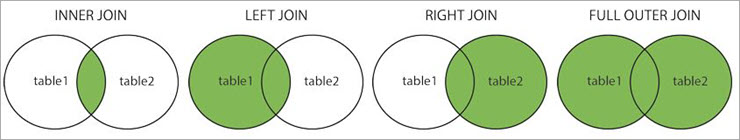
<center> Difference between INNER JOIN and OUTER JOIN </center>

As shown in the above diagram, there are two entities i.e. table 1 and table 2 and both the tables share some common data.

An Inner Join will return the common area between these tables (the green shaded area in the diagram above) i.e. all the records that are common between table 1 and table 2.

A Left Outer Join will return all the rows from table 1 and only those rows from table 2 which are common to table 1 as well. A Right Outer Join will do just the opposite. It will give all the records from table 2 and only the corresponding matching records from table 1.

Furthermore, a Full Outer Join will give us all the records from table 1 and table 2.

In [85]:
pd.merge(Table1,Table2,how='inner',on='CustID')

CustID   Q1   Q2   Q3   Q4
0   1001  101  201  301  401
1   1002  102  202  302  402
2   1003  103  203  303  403
3   1004  104  204  304  404

To explain a more complicated concept

In [86]:
Table1 = pd.DataFrame({'CustID1': ['1001', '1001', '1002', '1003'],
                       'CustID2': ['1001', '1002', '1001', '1002'],
                     'Q1': ['101', '102', '103', '104'],
                     'Q2': ['201', '202', '203', '204']})
   
Table2 = pd.DataFrame({'CustID1': ['1001', '1002', '1002', '1003'],
                       'CustID2': ['1001', '1001', '1001', '1001'],
                          'Q3': ['301', '302', '303', '304'],
                          'Q4': ['401', '402', '403', '404']}) 

In [88]:
Table1

CustID1 CustID2   Q1   Q2
0    1001    1001  101  201
1    1001    1002  102  202
2    1002    1001  103  203
3    1003    1002  104  204

In [89]:
Table2

CustID1 CustID2   Q3   Q4
0    1001    1001  301  401
1    1002    1001  302  402
2    1002    1001  303  403
3    1003    1001  304  404

In [93]:
pd.merge(Table1, Table2, on=['CustID1', 'CustID2'])

CustID1 CustID2   Q1   Q2   Q3   Q4
0    1001    1001  101  201  301  401
1    1002    1001  103  203  302  402
2    1002    1001  103  203  303  403

In [94]:
pd.merge(Table1, Table2, how='outer', on=['CustID1', 'CustID2'])

CustID1 CustID2   Q1   Q2   Q3   Q4
0    1001    1001  101  201  301  401
1    1001    1002  102  202  NaN  NaN
2    1002    1001  103  203  302  402
3    1002    1001  103  203  303  403
4    1003    1002  104  204  NaN  NaN
5    1003    1001  NaN  NaN  304  404

In [91]:
pd.merge(Table1, Table2, how='right', on=['CustID1', 'CustID2'])

CustID1 CustID2   Q1   Q2   Q3   Q4
0    1001    1001  101  201  301  401
1    1002    1001  103  203  302  402
2    1002    1001  103  203  303  403
3    1003    1001  NaN  NaN  304  404

In [92]:
pd.merge(Table1, Table2, how='left', on=['CustID1', 'CustID2'])

CustID1 CustID2   Q1   Q2   Q3   Q4
0    1001    1001  101  201  301  401
1    1001    1002  102  202  NaN  NaN
2    1002    1001  103  203  302  402
3    1002    1001  103  203  303  403
4    1003    1002  104  204  NaN  NaN

## Joining

Join can be used to combine columns of 2 dataframes that have different index values into a signle dataframe

In [95]:
Table1 = pd.DataFrame({'Q1': ['101', '102', '103'],
                     'Q2': ['201', '202', '203']},
                      index=['I0', 'I1', 'I2']) 

Table2 = pd.DataFrame({'Q3': ['301', '302', '303'],
                    'Q4': ['401', '402', '403']},
                      index=['I0', 'I2', 'I3'])

In [96]:
Table1

Q1   Q2
I0  101  201
I1  102  202
I2  103  203

In [97]:
Table2

Q3   Q4
I0  301  401
I2  302  402
I3  303  403

In [98]:
Table1.join(Table2)

Q1   Q2   Q3   Q4
I0  101  201  301  401
I1  102  202  NaN  NaN
I2  103  203  302  402

In [99]:
Table1.join(Table2, how='outer')

Q1   Q2   Q3   Q4
I0  101  201  301  401
I1  102  202  NaN  NaN
I2  103  203  302  402
I3  NaN  NaN  303  403

In [100]:
#Table1.merge(Table2, how='outer')  #no common columns
pd.concat([Table1,Table2])

Q1   Q2   Q3   Q4
I0  101  201  NaN  NaN
I1  102  202  NaN  NaN
I2  103  203  NaN  NaN
I0  NaN  NaN  301  401
I2  NaN  NaN  302  402
I3  NaN  NaN  303  403

## Operations

Let us discuss some useful Operations using Pandas

In [101]:
import pandas as pd
dataframe = pd.DataFrame({'custID':[1,2,3,4],'SaleType':['big','small','medium','big'],'SalesCode':['121','131','141','151']})
dataframe.head()

custID SaleType SalesCode
0       1      big       121
1       2    small       131
2       3   medium       141
3       4      big       151

### Info on Unique Values

In [102]:
dataframe['SaleType'].unique()

array(['big', 'small', 'medium'], dtype=object)

In [103]:
dataframe['SaleType'].nunique()

3

In [104]:
dataframe['SaleType'].value_counts()

big       2
small     1
medium    1
Name: SaleType, dtype: int64

In [106]:
dataframe[dataframe['SaleType'] == 'big'].count()

custID       2
SaleType     2
SalesCode    2
dtype: int64

### Selecting Data

In [107]:
#Select from DataFrame using criteria from multiple columns
newdataframe = dataframe[(dataframe['custID']!=3) & (dataframe['SaleType']=='big')]

In [108]:
newdataframe

custID SaleType SalesCode
0       1      big       121
3       4      big       151

### Applying Functions

In [109]:
def profit(a):
    return a*4

In [110]:
dataframe['custID'].apply(profit)

0     4
1     8
2    12
3    16
Name: custID, dtype: int64

In [111]:
dataframe['SaleType'].apply(len)

0    3
1    5
2    6
3    3
Name: SaleType, dtype: int64

In [112]:
dataframe['custID'].sum()

10

**Permanently Removing a Column**

In [113]:
del dataframe['custID']

In [114]:
dataframe

SaleType SalesCode
0      big       121
1    small       131
2   medium       141
3      big       151

**Get column and index names:**

In [115]:
dataframe.columns

Index(['SaleType', 'SalesCode'], dtype='object')

In [116]:
dataframe.index

RangeIndex(start=0, stop=4, step=1)

**Sorting and Ordering a DataFrame:**

In [117]:
dataframe

SaleType SalesCode
0      big       121
1    small       131
2   medium       141
3      big       151

In [118]:
dataframe.sort_values(by='SaleType') #inplace=False by default

SaleType SalesCode
0      big       121
3      big       151
2   medium       141
1    small       131

**Find Null Values or Check for Null Values**

In [119]:
dataframe.isnull()

SaleType  SalesCode
0     False      False
1     False      False
2     False      False
3     False      False

In [120]:
# Drop rows with NaN Values
dataframe.dropna()

SaleType SalesCode
0      big       121
1    small       131
2   medium       141
3      big       151

**Filling in NaN values with something else:**

In [121]:
import numpy as np

In [122]:
dataframe = pd.DataFrame({'Sale1':[5,np.nan,10,np.nan],
                   'Sale2':[np.nan,121,np.nan,141],
                   'Sale3':['XUI','VYU','NMA','IUY']})
dataframe.head()

Sale1  Sale2 Sale3
0    5.0    NaN   XUI
1    NaN  121.0   VYU
2   10.0    NaN   NMA
3    NaN  141.0   IUY

In [123]:
dataframe.fillna('Not nan')

Sale1    Sale2 Sale3
0        5  Not nan   XUI
1  Not nan      121   VYU
2       10  Not nan   NMA
3  Not nan      141   IUY

# Data Input and Output
Reading DataFrames from external sources using pd.read functions

In [124]:
import numpy as np
import pandas as p

## CSV

### CSV Input

In [140]:
import os
os.getcwd()

dataframe = pd.read_csv('.\\CSV files for Pandas Lecture-20201119\\train.csv')

In [141]:
dataframe.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [142]:
dataframe.tail(2)

PassengerId  Survived  Pclass                   Name   Sex   Age  SibSp  \
889          890         1       1  Behr, Mr. Karl Howell  male  26.0      0   
890          891         0       3    Dooley, Mr. Patrick  male  32.0      0   

     Parch  Ticket   Fare Cabin Embarked  
889      0  111369  30.00  C148        C  
890      0  370376   7.75   NaN        Q

### CSV Output

In [189]:
dataframe.to_csv('train2.csv',index=False)    # If index=FALSE then csv does not store index values

## Excel

Using Pandas, one can read excel files, however it can only import data. It does not fetch formulae or any formatting/images/macros and having such things in excel files can crash the python function to crash and not execute successfully.

### Excel Input

In [235]:
dataframe2=pd.read_excel('.\\CSV files for Pandas Lecture-20201119\\Consumer.xlsx',sheet_name='Data1')

In [191]:
dataframe2.head(2)

Income  HouseholdSize  AmountCharged
0      54              3           4016
1      30              2           3159

In [192]:
dataframe2.tail(2)

Income  HouseholdSize  AmountCharged
48      46              5           4820
49      66              4           5149

### Excel Output

In [149]:
dataframe2.to_excel('Consumer2.xlsx',sheet_name='Sheet1')

In [150]:
dataframe2.columns

Index(['Income', 'HouseholdSize', 'AmountCharged'], dtype='object')

In [151]:
dataframe2.shape

(50, 3)

In [152]:
dataframe2.index

RangeIndex(start=0, stop=50, step=1)

In [153]:
dataframe2.axes

[RangeIndex(start=0, stop=50, step=1),
 Index(['Income', 'HouseholdSize', 'AmountCharged'], dtype='object')]

In [154]:
dataframe2.isnull().sum()

Income           0
HouseholdSize    0
AmountCharged    0
dtype: int64

In [155]:
dataframe2['Income'].mean()

43.48

In [156]:
dataframe2['Income'].max()

67

In [216]:
dataframe2.describe()

Income  HouseholdSize  AmountCharged
count  50.000000      50.000000      50.000000
mean   43.480000       3.420000    3964.060000
std    14.550742       1.738989     933.494082
min    21.000000       1.000000    1864.000000
25%    30.250000       2.000000    3130.500000
50%    42.000000       3.000000    4090.000000
75%    54.750000       4.750000    4732.750000
max    67.000000       7.000000    5678.000000

In [215]:
dataframe2.describe(include='all')

Income  HouseholdSize  AmountCharged
count  50.000000      50.000000      50.000000
mean   43.480000       3.420000    3964.060000
std    14.550742       1.738989     933.494082
min    21.000000       1.000000    1864.000000
25%    30.250000       2.000000    3130.500000
50%    42.000000       3.000000    4090.000000
75%    54.750000       4.750000    4732.750000
max    67.000000       7.000000    5678.000000

In [217]:
dataframe2.describe(include='O')

ValueError: No objects to concatenate

# Matplotlib with Pandas

## Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. 

Data Visualization is an important part of business activities as organizations nowadays collect a huge amount of data. Sensors all over the world are collecting climate data, user data through clicks, car data for prediction of steering wheels etc. All of these data collected hold key insights for businesses and visualizations make these insights easy to interpret.

### Importing Matplotlib

In [159]:
import matplotlib.pyplot as plt

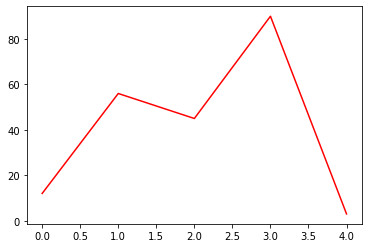

In [160]:
plt.plot([12,56,45,90,3], color='red')

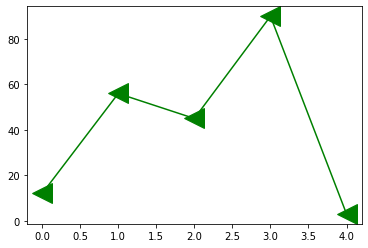

In [161]:
plt.plot([12,56,45,90,3], color='green', marker='<', markersize=20)

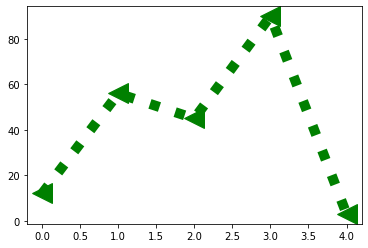

In [162]:
plt.plot([12,56,45,90,3], color='green', marker='<', markersize=20, linestyle=':', linewidth=10)

In [163]:
sales=[1200,2300,2400,4477,7900]
profit=[100,450,300,567,678]

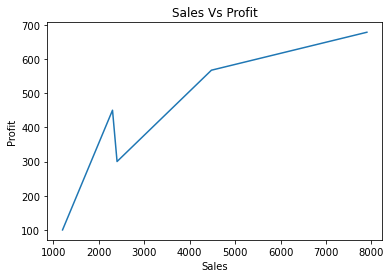

In [164]:
plt.plot(sales,profit)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales Vs Profit")
plt.show()

In [165]:
import numpy as np
a=np.linspace(10,200,100)

In [166]:
b=np.linspace(10,100,100)

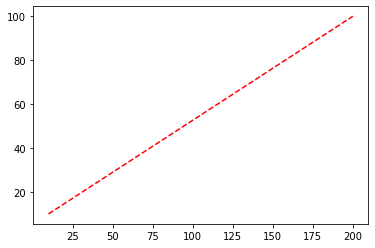

In [167]:
plt.plot(a,b, color='red', linestyle='--')

In [168]:
x=np.linspace(10,20,50)

In [169]:
y=np.log(x)

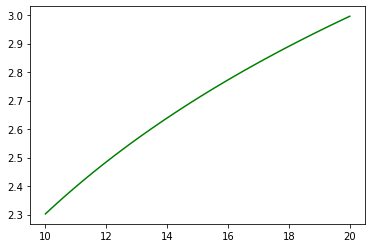

In [170]:
plt.plot(x,y, color='green')
plt.show()

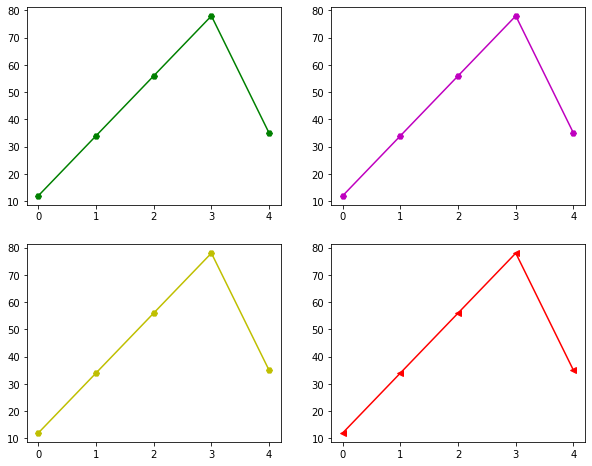

In [171]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,4)
plt.plot([12,34,56,78,35], color='red', marker='<')
plt.subplot(2,2,1)
plt.plot([12,34,56,78,35], color='green', marker='H')
plt.subplot(2,2,3)
plt.plot([12,34,56,78,35], color='y', marker='H')
plt.subplot(2,2,2)
plt.plot([12,34,56,78,35], color='m', marker='H')

### Basic plotting: plot

The plot method on Series and DataFrame is just a simple wrapper around **plt.plot()**:

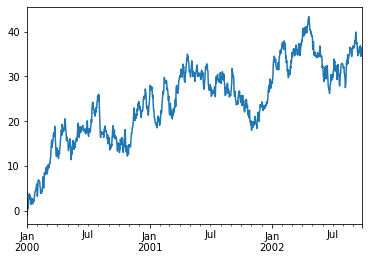

In [172]:
import pandas as pd
import numpy as np
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000)) 
ts = ts.cumsum()
ts.plot()

                    A          B         C         D
2000-01-01   1.676594   0.230956  0.865996  0.550129
2000-01-02   2.240096   0.953881  2.330915  1.208202
2000-01-03   2.466537   0.230620  0.696647  2.868340
2000-01-04   1.694156  -0.768213 -0.233400  2.862894
2000-01-05   1.613377  -0.279321 -1.089598  3.009504
...               ...        ...       ...       ...
2002-09-22 -32.624223 -23.118419 -6.661892 -7.905274
2002-09-23 -33.663589 -23.667676 -5.772744 -8.978259
2002-09-24 -32.843425 -22.481831 -6.251422 -8.688536
2002-09-25 -32.723160 -23.018692 -5.622298 -7.072893
2002-09-26 -32.956855 -22.218965 -7.075500 -7.820336

[1000 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

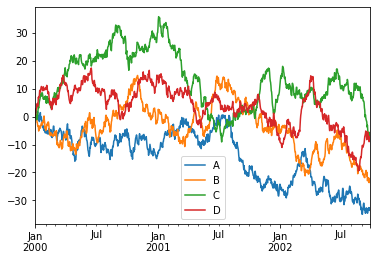

In [194]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A','B','C','D'])
df = df.cumsum()
print(df)
plt.figure()
df.plot()

**Other plots**
Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:  

'bar' or 'barh' for bar plots  

'hist' for histogram  

'box' for boxplot  

'kde' or 'density' for density plots  

'area' for area plots  

'scatter' for scatter plots  

'hexbin' for hexagonal bin plots  

'pie' for pie plots  

### Bar plots  
For labeled, non-time series data, you may wish to produce a bar plot:

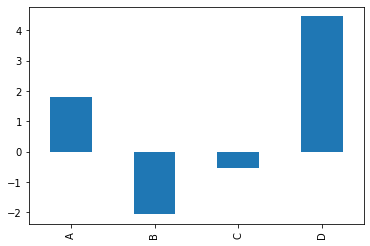

In [195]:
plt.figure();
df.iloc[5].plot(kind='bar');

#### Calling a DataFrame’s plot.bar() method produces a multiple bar plot:

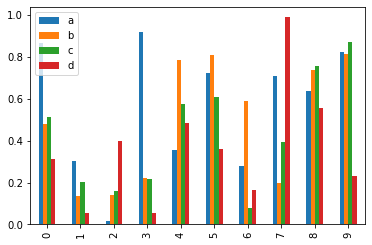

In [196]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar();

#### To produce a stacked bar plot, pass stacked=True:

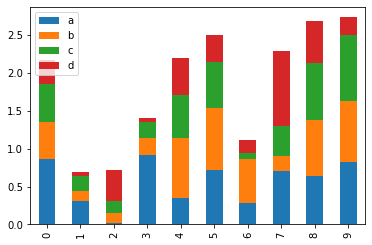

In [197]:
df2.plot.bar(stacked=True)

#### To get horizontal bar plots, use the barh method:

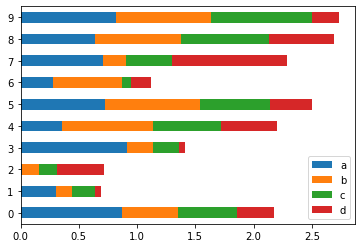

In [198]:
df2.plot.barh(stacked=True)

### Histograms

Histograms can be drawn by using the DataFrame.plot.hist() and Series.plot.hist() methods.

<Figure size 432x288 with 0 Axes>

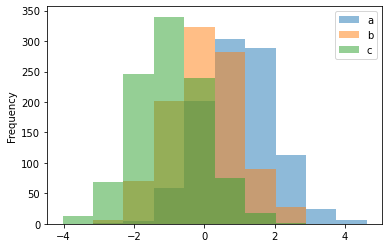

In [199]:
 df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                     'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c']) 
plt.figure()
df4.plot.hist(alpha=0.5)

### Box plots
Boxplot can be drawn calling Series.plot.box() and DataFrame.plot.box(), or DataFrame.boxplot() to visualize the distribution of values within each column

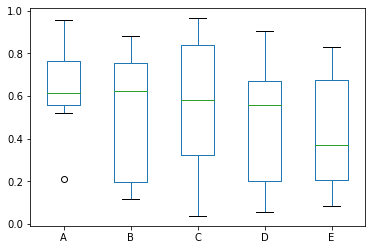

In [219]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()

Boxplot can be colorized by passing color keyword. You can pass a dict whose keys are boxes, whiskers, medians and caps. If some keys are missing in the dict, default colors are used for the corresponding artists. Also, boxplot has sym keyword to specify fliers style.

When you pass other type of arguments via color keyword, it will be directly passed to matplotlib for all the boxes, whiskers, medians and caps colorization.

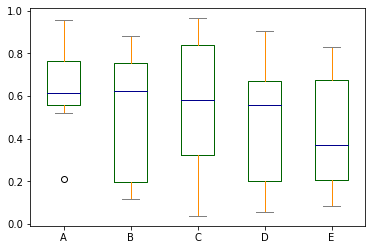

In [220]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
df.plot.box(color=color)  #, sym='r+'

Also, you can pass other keywords supported by matplotlib boxplot. For example, horizontal and custom-positioned boxplot can be drawn by vert=False and positions keywords.

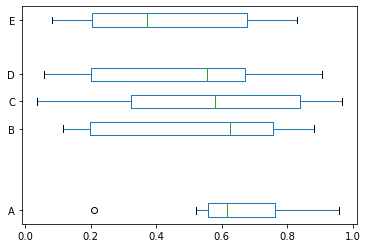

In [221]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

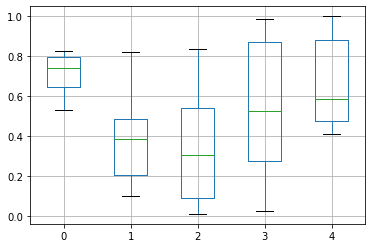

In [222]:
df = pd.DataFrame(np.random.rand(10, 5))
plt.figure();
bp = df.boxplot()

### Area plot  
You can create area plots with Series.plot.area() and DataFrame.plot.area(). Area plots are stacked by default. To produce stacked area plot, each column must be either all positive or all negative values.  

When input data contains NaN, it will be automatically filled by 0. If you want to drop or fill by different values, use dataframe.dropna() or dataframe.fillna() before calling plot.

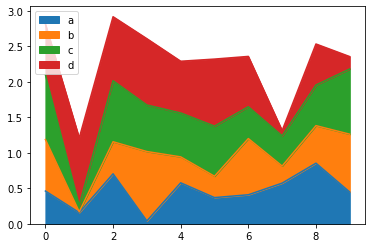

In [223]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area();

To produce an unstacked plot, pass stacked=False. Alpha value is set to 0.5 unless otherwise specified:

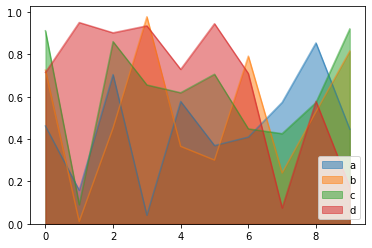

In [224]:
df.plot.area(stacked=False)

### Scatter plot

Scatter plot can be drawn by using the DataFrame.plot.scatter() method. Scatter plot requires numeric columns for the x and y axes. These can be specified by the x and y keywords.

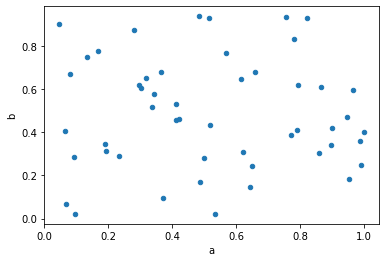

In [225]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')

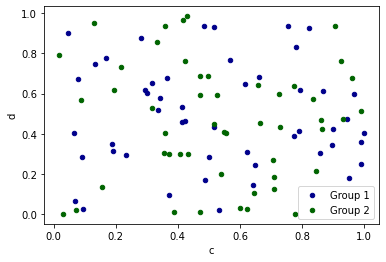

In [226]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

### Hexagonal bin plot
You can create hexagonal bin plots with DataFrame.plot.hexbin(). Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.

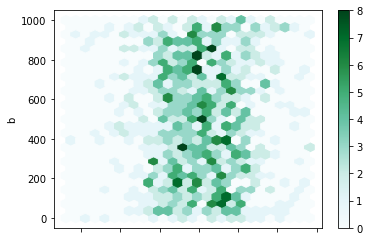

In [227]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.plot.hexbin(x='a', y='b', gridsize=25)

A useful keyword argument is gridsize; it controls the number of hexagons in the x-direction, and defaults to 100. A larger gridsize means more, smaller bins.

### Pie plot
You can create a pie plot with DataFrame.plot.pie() or Series.plot.pie(). If your data includes any NaN, they will be automatically filled with 0. A ValueError will be raised if there are any negative values in your data.

In [228]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')

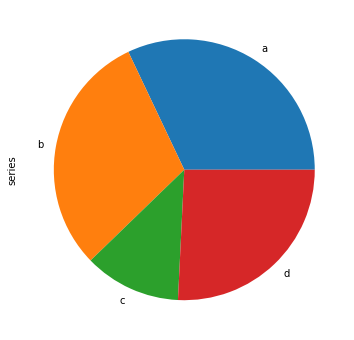

In [229]:
series.plot.pie(figsize=(6, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B7FEBD888>,
      dtype=object)

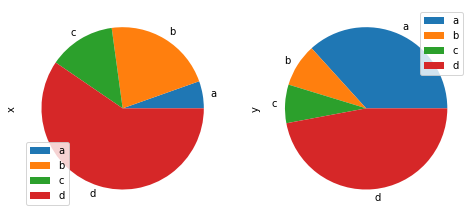

In [230]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df.plot.pie(subplots=True, figsize=(8, 4))

If you want to hide wedge labels, specify labels=None. If fontsize is specified, the value will be applied to wedge labels. Also, other keywords supported by matplotlib.pyplot.pie() can be used.

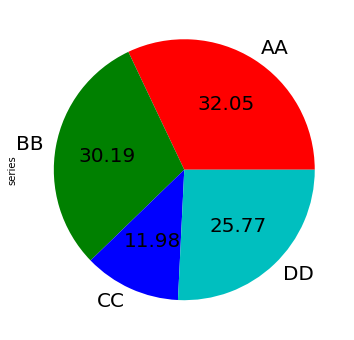

In [231]:
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'], autopct='%.2f', fontsize=20, figsize=(6, 6))

### Plotting with missing data
Pandas tries to be pragmatic about plotting DataFrames or Series that contain missing data. Missing values are dropped, left out, or filled depending on the plot type.  

Plot Type ---------------->NaN Handling

Line---------------------->Leave gaps at NaNs

Line (stacked)------------>Fill 0’s

Bar ---------------------->Fill 0’s

Scatter------------------->Drop NaNs

Histogram----------------->Drop NaNs (column-wise)

Box----------------------->Drop NaNs (column-wise)

Area---------------------->Fill 0’s

KDE----------------------->Drop NaNs (column-wise)

Hexbin-------------------->Drop NaNs

Pie----------------------->Fill 0’s  

If any of these defaults are not what you want, or if you want to be explicit about how missing values are handled, consider using fillna() or dropna() before plotting.

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [236]:
import os

auto = pd.read_csv('.\\CSV files for Pandas Lecture-20201119\\Automobile.csv')
#https://archive.ics.uci.edu/ml/datasets/automobile ---->Data set description

In [237]:
auto.head(2)

symboling  normalized_losses         make fuel_type aspiration  \
0          3                168  alfa-romero       gas        std   
1          3                168  alfa-romero       gas        std   

  number_of_doors   body_style drive_wheels engine_location  wheel_base  ...  \
0             two  convertible          rwd           front        88.6  ...   
1             two  convertible          rwd           front        88.6  ...   

   engine_size  fuel_system  bore  stroke compression_ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   
1          130         mpfi  3.47    2.68               9.0        111   

   peak_rpm city_mpg  highway_mpg  price  
0      5000       21           27  13495  
1      5000       21           27  16500  

[2 rows x 26 columns]

In [238]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

### Histogram

A histogram shows the distribution of numeric data through a continuous interval by segmenting data into different bins. Useful for inspecting skewness in the data.

C:\Users\jymch\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:404: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


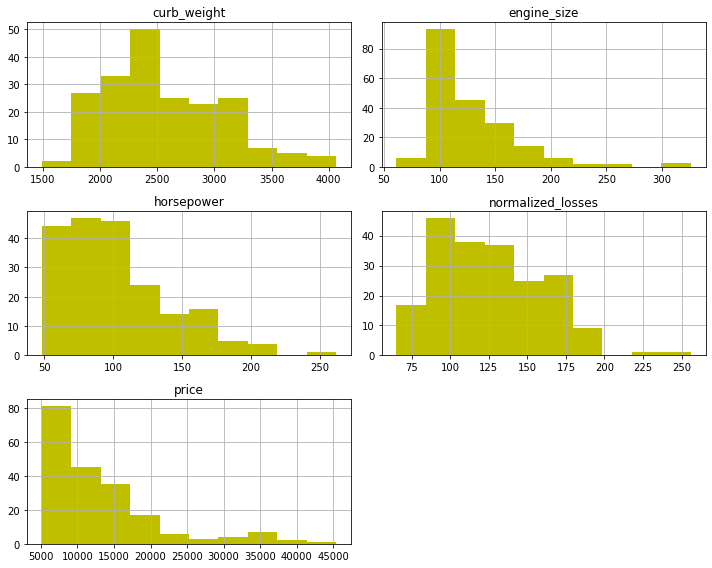

In [239]:
# 1 plt.figure(figsize=(10,8))
auto[['normalized_losses','engine_size','curb_weight', 'horsepower','price']].hist(figsize=(10,8),bins=10,color='Y')
# 2 plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

In [ ]:
#auto[['normalized_losses','engine_size','curb_weight', 'horsepower','price']].plot.hist()
#plt.tight_layout()
#plt.show()

**Findings**  
- Most of the car has a Curb Weight is in range 1900 to 3100
- The Engine Size is inrange 60 to 190
- Most vehicle has horsepower 50 to 125
- Most Vehicle are in price range 5000 to 18000
- peak rpm is mostly distributed between 4600 to 5700

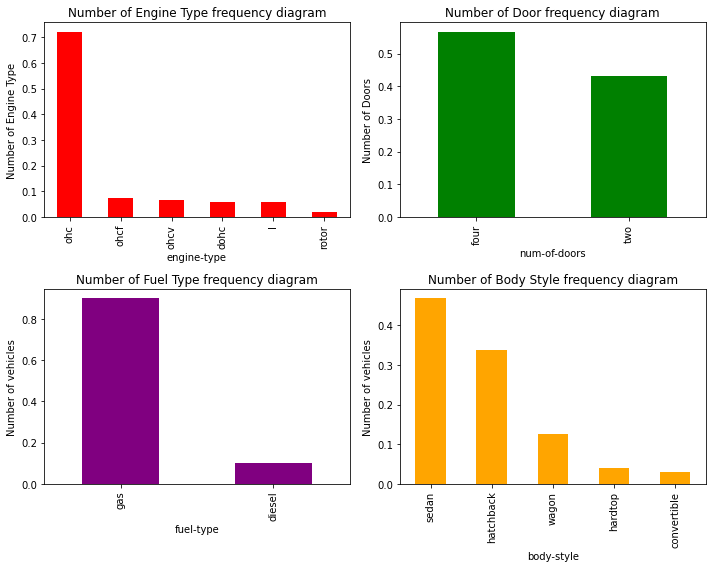

In [240]:
plt.figure(1)
plt.subplot(221)
auto['engine_type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');

plt.subplot(222)
auto['number_of_doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(223)
auto['fuel_type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');

plt.subplot(224)
auto['body_style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()

**Findings**   

- More than 70 % of the vehicle has Ohc type of Engine
- 57% of the cars has 4 doors
- Gas is preferred by 85 % of the vehicles
- Most produced vehicle are of body style sedan around 48% followed by hatchback 32%

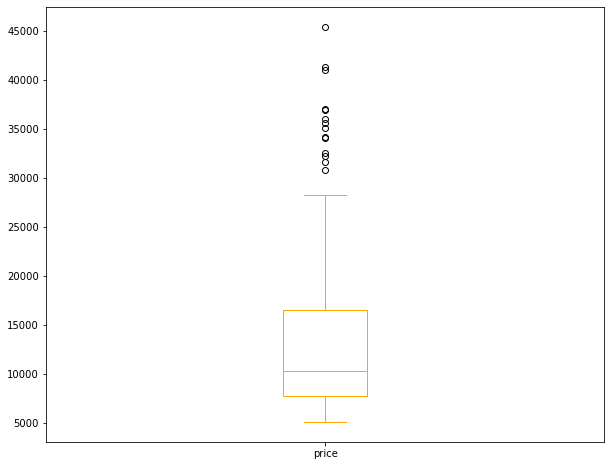

In [241]:
auto['price'].plot(figsize=(10,8),kind='box',color='orange')
#auto.boxplot(['price'], by=['body_style'])

In [242]:
auto_numerical_features = auto[auto.describe().columns]

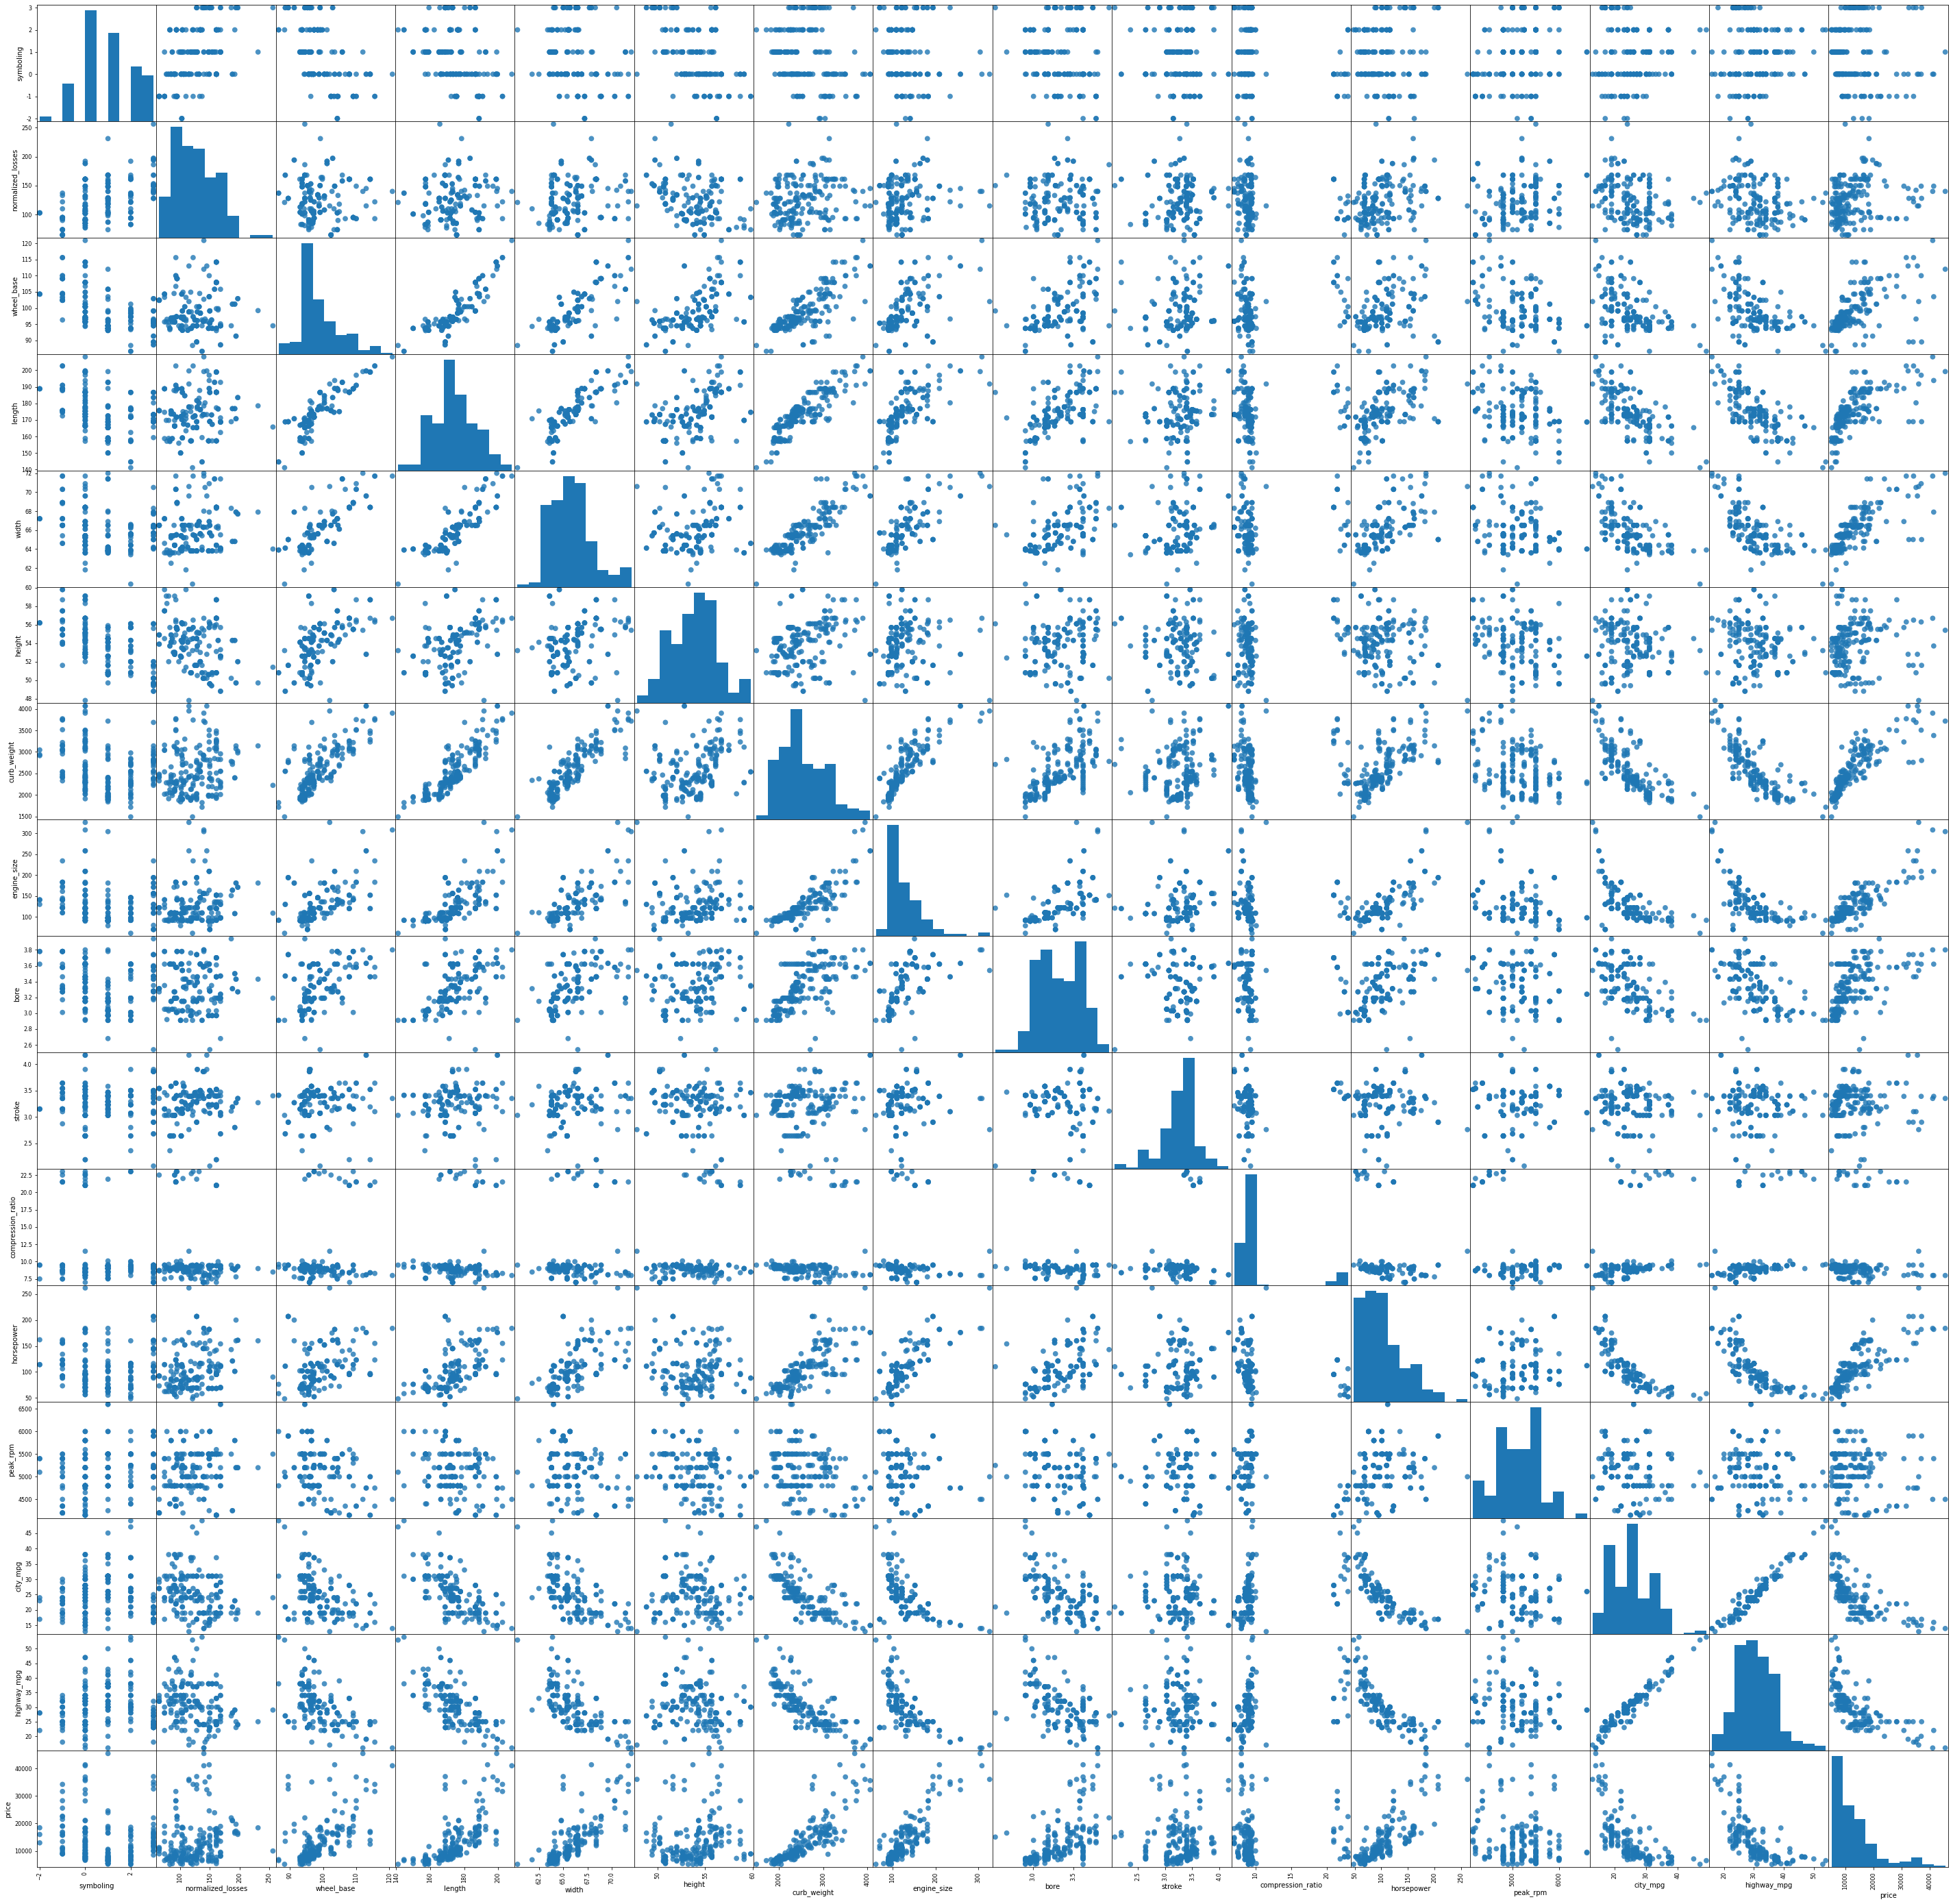

In [243]:
g = pd.plotting.scatter_matrix(auto_numerical_features, figsize=(50,50), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

In [ ]:
g = pd.plotting.scatter_matrix(auto[['normalized_losses', 'engine_size', 'horsepower']], figsize=(10,10), marker = 'o')
plt.show()

In [ ]:
corr = auto.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
import seaborn as sns
corr = auto.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

In [ ]:
auto[auto.describe(include="O").columns]

In [ ]:
auto['make'].value_counts().plot.pie(subplots=True, figsize=(10, 15))

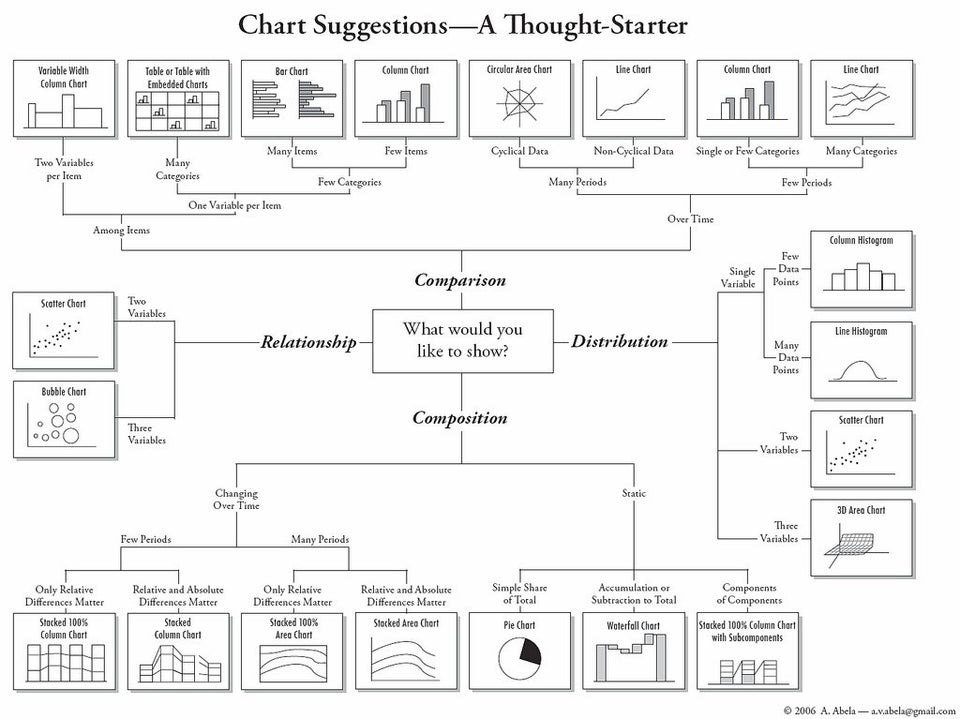